**Task**

For this assignment, you will revisit your first project to predict supermarket sales. You will apply what you've learned this week to explain how your models made their predictions.

**Project 1 Revisited - Part 1: Remaking, Saving, and Explaining Your Models**

For this part of the project, you will be producing a new version of your final project notebook using the updated tools in sklearn v1.2. You should continue to save your work in the same repo as your original Project 1. 

Create a new notebook called "Project 1 - Revisited.ipynb" in your original project repo.
You may either make a copy of your prior notebook that you will modify,
or you can start a new blank notebook and copy over the code from your old notebook (as needed).

Remake your X_train and X_test as DataFrames with the feature names extracted from the column transformer instead of combining your preprocessor and model into 1 pipeline.

**Linear Regression**

Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.

Extract and visualize the coefficients that your model determined.

Select the top 3 most impactful features and interpret their coefficients in plain English.
Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

**Tree-Based Model**

Fit and evaluate your tree-based regression model using your dataframe X_train and X_test data.

Extract and visualize the feature importances that your model determined.
Identify the top 5 most important features.

Save your figure as a .png file inside your repository  (you will need this for the final piece of this assignment - Update Your README).

**Serialize Your Best Models with Joblib**

Once you've finished updating and explaining your models, you must save the following key: value pairs as a dictionary in a joblib file named "best-models.joblib":

"preprocessor": your preprocessing  column transformer

"X_train": your training features.

"X_test": your test features.

"y_train": your training target.

"y_test": your test target.

"LinearRegression": your best linear regression

Your tree-based model's class name: your best tree-based model.
e.g. "RandomForestRegressor"/"DecisionTreeRegressor"

Save your joblib file inside your repository. (You will work with these models again in the next core assignment.)

**Update your README.**

Insert your exported figures from above into your README file. You should have the following:

Your LinearRegression coefficients plot.
 Your interpretation of your coefficients.
 
Your tree-based model's feature importances.
Your interpretation of your feature importances. 

Submit the link to your project repository as your final submission.

In [2]:
##Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

##Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

##Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

##Setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
##Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

**Load and Clean Data**

In [3]:
data = pd.read_csv('Data/sales_predictions_2023.csv', index_col='Item_Identifier')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Ordinal Encoding for Item Fat Content
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [5]:
data['Item_Fat_Content'].replace({'Low Fat':0 , 'LF':0 , 'low fat':0 , 'Regular':1 , 'reg':1}, inplace=True)

In [6]:
#Ordinal Encoding for Outlet Size
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
data['Outlet_Size'].replace({'Small':0 , 'Medium':1 , 'High':2}, inplace=True)

In [8]:
#Ordinal Encoding for Outlet Location Type
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [9]:
data['Outlet_Location_Type'].replace({'Tier 1':0 , 'Tier 2':1 , 'Tier 3':2}, inplace=True)

**Preprocessing and Making Dataframes**

In [10]:
#Define X and y variables
y = data['Item_Outlet_Sales']
X = data.drop(columns = 'Item_Outlet_Sales')
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = SEED)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDI60,7.220,1,0.064142,Baking Goods,61.2510,OUT010,1998,NaN,2,Grocery Store
DRD25,6.135,0,0.079294,Soft Drinks,111.2860,OUT018,2009,1.0,2,Supermarket Type2
NCP18,12.150,0,0.028593,Household,151.0708,OUT035,2004,0.0,1,Supermarket Type1
NCS30,5.945,0,0.093009,Household,127.8652,OUT035,2004,0.0,1,Supermarket Type1
FDI08,18.200,1,0.066285,Fruits and Vegetables,247.2092,OUT035,2004,0.0,1,Supermarket Type1


In [11]:
#Make Category Selector
cat_sel = make_column_selector(dtype_include='object')
#Make Number Selector
num_sel = make_column_selector(dtype_include='number')
#Make Category Pipe
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                        OneHotEncoder(drop='if_binary', sparse=False))
#Make Number Pipe
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
#Preprocessor
preprocessor = make_column_transformer((num_pipe, num_sel),
                                      (cat_pipe, cat_sel),
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x161f94130>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x161f941c0>)],
                  verbose_feature_names_out=False)

In [12]:
#Fit column transformer and get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Ty

In [13]:
#Remake X_train DFs with feature names
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                         columns = feature_names, index = X_train.index)
X_train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDI60,7.220,1.0,0.064142,61.2510,1998.0,0.760582,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
DRD25,6.135,0.0,0.079294,111.2860,2009.0,1.000000,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
NCP18,12.150,0.0,0.028593,151.0708,2004.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NCS30,5.945,0.0,0.093009,127.8652,2004.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDI08,18.200,1.0,0.066285,247.2092,2004.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
#Remaketest X_test DF's w/feature names
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                         columns = feature_names, index = X_test.index)
X_test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
NCY06,15.250000,0.0,0.061531,132.2968,2007.0,0.760582,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDZ10,17.850000,0.0,0.044463,127.1020,1997.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
DRF49,7.270000,0.0,0.071078,114.2518,1997.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
FDN23,12.822634,1.0,0.075142,145.8444,1985.0,1.000000,2.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NCH54,13.500000,0.0,0.121633,161.6920,1998.0,0.760582,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
#Check if y_test matches X_test_df
y_test.head()

Item_Identifier
NCY06    1696.4584
FDZ10    2024.0320
DRF49    2618.5914
FDN23    3773.7544
NCH54     159.7920
Name: Item_Outlet_Sales, dtype: float64

They match!

**Linear Regression**

In [16]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,as_frame=True): 
  """Evaluates a scikit learn regression model using r-squared and RMSE. 
  Returns the results a DataFrame if as_frame is True (Default).
  """
  ## Training Data
  y_pred_train = model.predict(X_train)
  r2_train = metrics.r2_score(y_train, y_pred_train)
  rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                          squared=False)
  mae_train = metrics.mean_absolute_error(y_train, y_pred_train)


  ## Test Data
  y_pred_test = model.predict(X_test)
  r2_test = metrics.r2_score(y_test, y_pred_test)
  rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                          squared=False)
  mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

  ## if returning a dataframe:
  if as_frame:
      df_version =[['Split','R^2','MAE','RMSE']]
      df_version.append(['Train',r2_train, mae_train, rmse_train])
      df_version.append(['Test',r2_test, mae_test, rmse_test])
      df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
      df_results = df_results.round(2)


      # adapting hide_index for pd version
      if pd.__version__ < "1.4.0":
        display(df_results.style.hide_index().format(precision=2, thousands=','))
      else:
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))

  ## If not dataframe, just print results.    
  else: 
      print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
      print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")



def plot_residuals(model,X_test_df, y_test,figsize=(12,5)):
  """Plots a Q-Q Plot and residual plot for a regression model.
  """
  ## Make predictions and calculate residuals
  y_pred = model.predict(X_test_df)
  resid = y_test - y_pred

  fig, axes = plt.subplots(ncols=2,figsize=figsize)

  ## Normality 
  sm.graphics.qqplot(resid, line='45',fit=True,ax=axes[0]);

  ## Homoscedascity
  ax = axes[1]
  ax.scatter(y_pred, resid, edgecolor='white',lw=0.5)
  ax.axhline(0,zorder=0)
  ax.set(ylabel='Residuals',xlabel='Predicted Value');
  fig.suptitle("Residual Plots", y=1.01)
  plt.tight_layout()


In [17]:
#Evaluate performance
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.56,826.46,"1,114.97"
Test,0.56,859.82,"1,164.62"


In [18]:
#Extract coefficients
coeffs = pd.Series(lin_reg.coef_, index=feature_names, name='Coefficients')
coeffs.head()

Item_Weight                  1.067856e+00
Item_Fat_Content             3.159571e+01
Item_Visibility             -2.481988e+02
Item_MRP                     1.560217e+01
Outlet_Establishment_Year    1.124337e+13
Name: Coefficients, dtype: float64

In [19]:
#Rank the top 10 cefficients
top_n = 10
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n)
coeffs_plot = coeffs.loc[top_n_features.index].sort_values()
coeffs_plot

Outlet_Identifier_OUT049        -1.690113e+14
Outlet_Location_Type            -1.074868e+14
Outlet_Identifier_OUT017        -9.567841e+13
Outlet_Type_Supermarket Type1   -7.812704e+13
Outlet_Type_Supermarket Type2   -7.270603e+13
Outlet_Identifier_OUT018        -7.189241e+13
Outlet_Type_Grocery Store        7.707836e+13
Outlet_Identifier_OUT046         8.651139e+13
Outlet_Identifier_OUT035         1.152946e+14
Outlet_Size                      2.330360e+14
Name: Coefficients, dtype: float64

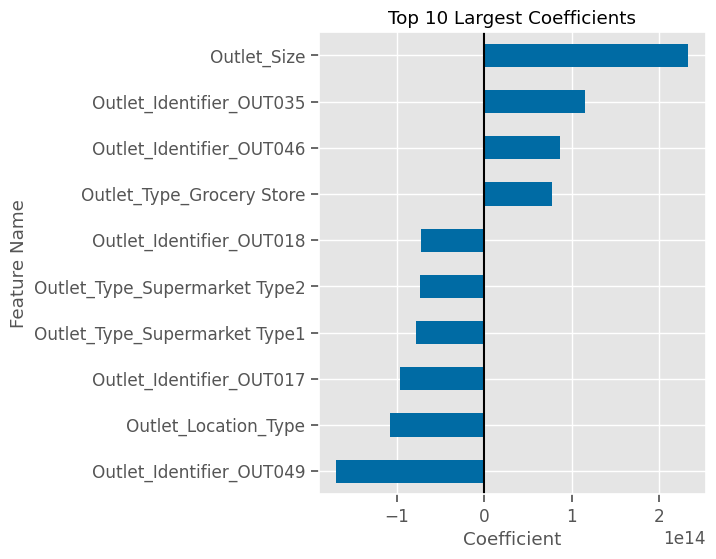

In [20]:
#Visualize coefficients
ax = coeffs_plot.sort_values().plot(kind='barh', figsize=(5,6))
ax.axvline(0,color='k');
ax.set(title = f'Top {top_n} Largest Coefficients', ylabel='Feature Name',
      xlabel='Coefficient');

Based on the above plot, the most impactful features are 'Outlet_Size', 'Outlet_Identifier_OUT049', and 'Outlet_Identifier_Out35'.

What this means is that for every 1 point increase in 'Outlet_Size', the predicted sales price increases by  2.330360e+14. 

For every 1 point increase in 'Outlet_Identifier_OUT049', the sales price decreases by -1.690113e+14. 

Finally, for every 1 point increase in 'Outlet_Identifier_OUT035', the predicted sales price increases by 1.152946e+14.

**Random Forest**

In [21]:
#Evaluate performance of Random Forest Model
for_reg = RandomForestRegressor()
for_reg.fit(X_train_df, y_train)
evaluate_regression(for_reg, X_train_df, y_train, X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.94,291.99,423.35
Test,0.56,813.22,"1,161.89"


In [22]:
#Extract feature importances
feature_importance = pd.Series(for_reg.feature_importances_, index=feature_names,
                               name='Feature Importances')
feature_importance.head()

Item_Weight                  0.053540
Item_Fat_Content             0.008343
Item_Visibility              0.098041
Item_MRP                     0.444426
Outlet_Establishment_Year    0.028072
Name: Feature Importances, dtype: float64

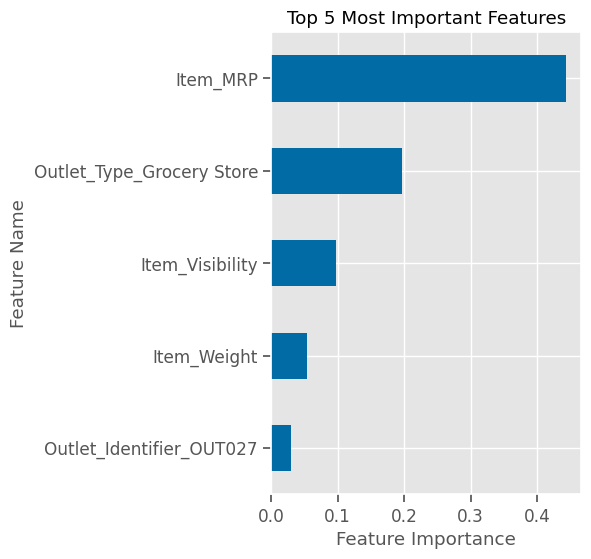

In [23]:
#Plot top 5 most important features
ax = feature_importance.sort_values().tail(5).plot(kind='barh', figsize=(4,6))
ax.set(ylabel='Feature Name', xlabel='Feature Importance',
      title='Top 5 Most Important Features');

The above plot depicts the top 5 most important features in predicting price in our Random Forest Model with the feature 'Item_MRP' being the obvious most important.

**Serialize with Joblib**

In [24]:
import joblib, os

##Creating a dictionary of all of the variables to save for later
export = {'X_train':X_train,
         'y_train':y_train,
         'X_test':X_test,
         'y_test':y_test,
          'preprocessor':preprocessor,
         'LinearRegression': lin_reg,
          'RandomForestRegressor':for_reg
         }
joblib.dump(export, 'best-models.joblib')

['best-models.joblib']